In [1]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [3]:
print(data.shape,target.shape)
X_test = data[654:]
Y_test = target[654:]

(754, 27827) (754,)


In [4]:
kernel_params = {"kernel": "rbf", "gamma": 1.0}
alpha = 1e-6
krr = KernelRidge(alpha = alpha, **kernel_params)
n_components = 50
pca = PCA(n_components = n_components)
rr = Ridge(alpha= alpha)
losses = []
losses_pca = []
for n in np.arange(50,654,50):
    X_train = data[:n]
    Y_train = target[:n]
    krr.fit(X_train,Y_train)
    Y_pred = krr.predict(X_test)
    loss = mean_squared_error(Y_test, Y_pred)
    print(loss)
    losses.append(loss)
    pca.fit(X_train)
    T_train = pca.transform(X_train)
    T_test = pca.transform(X_test)
    krr.fit(T_train,Y_train)
    Y_pred_pca = krr.predict(T_test)
    loss_pca = mean_squared_error(Y_test, Y_pred_pca)
    print(loss_pca)
    losses_pca.append(loss_pca)

21.17797375665267
14.564978182368538
9.111206121736167
5.4386053386138995
8.263064226343927
4.964440699202766
5.346821840990574
2.973263545446811
4.4488549257109815
2.3400037136168756
3.3925097265854935
1.588726793898983
3.3046413826633194
1.517277565879895
2.691635717159151
1.180952393662764
2.4254028853215184
1.14908842676378
1.972141852962872
0.8900440323686083
1.8301903685562748
0.8125166952452347
1.770906270881169
0.7609418982536983
1.657290326032813
0.7049704148029114


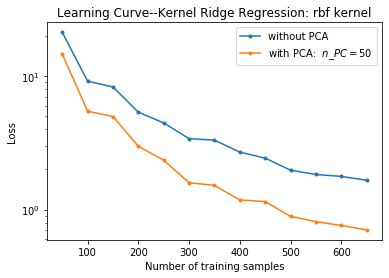

In [6]:
plt.plot(np.arange(50,654,50),losses,'.-', label='without PCA')
plt.plot(np.arange(50,654,50),losses_pca,'.-', label='with PCA:  '+'$n\_PC = {}$'.format(n_components))
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression: {} kernel'.format(kernel_params["kernel"]))
plt.show()